In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

In [150]:
df=pd.read_csv("final.csv",index_col=0)

In [151]:
df.head()

,Genre,Title,Artist,Explicit,Length,Scale,Key,BPM,Danceability,Positiveness,Liveness,Energy,speechness,KeyScaled,Lyrics,Not_Formatted_Lyrics,Lem_Lyrics,Lyrics_Length,Longest_Line,Length_Words_Ratio
0,rock,into the storm,gojira,False,5.02,D,Major,106,25,11,13,97,7,D,go say something about awakening the rebellion...,Go\r\n\r\nSay something about awakening\r\nThe...,awaken rebellion wake change course law follow...,173,47,34.462151
1,rock,the sound of silence,disturbed,False,4.08,F#,Minor,86,32,18,10,28,3,F#m,hello darkness my old friend i have come to ta...,"Hello darkness, my old friend\r\nI've come to ...",hello darkness old friend I talk vision softly...,218,97,53.431373
2,rock,amazonia,gojira,False,5.00,A,Major,182,38,51,24,95,4,A,incite a riot put yourself in a trance you rot...,"Incite a riot, put yourself in a trance\r\nYou...",incite riot put trance rotate frame world rely...,154,48,30.800000
3,rock,back in black,ac/dc,False,4.15,A,Major,188,31,76,8,70,5,A,back in black i hit the sack i have been too l...,"Back in black, I hit the sack\r\nI've been too...",back black I hit sack I long I glad back yes I...,307,55,73.975904
4,rock,another world,gojira,False,4.24,G,Minor,170,35,24,12,88,4,Gm,we mock and slaughter all the purest kinds bli...,We mock and slaughter all the purest kinds\r\n...,mock slaughter pure kind blind noise maze flas...,95,53,22.405660


In [152]:
df.columns

Index(['Genre', 'Title', 'Artist', 'Explicit', 'Length', 'Scale', 'Key', 'BPM',
       'Danceability', 'Positiveness', 'Liveness', 'Energy', 'speechness',
       'KeyScaled', 'Lyrics', 'Not_Formatted_Lyrics', 'Lem_Lyrics',
       'Lyrics_Length', 'Longest_Line', 'Length_Words_Ratio'],
      dtype='object')

In [153]:
df.drop(['Lyrics','Title','Artist','KeyScaled','Not_Formatted_Lyrics'],axis=1,inplace=True)

In [154]:
df.head()

,Genre,Explicit,Length,Scale,Key,BPM,Danceability,Positiveness,Liveness,Energy,speechness,Lem_Lyrics,Lyrics_Length,Longest_Line,Length_Words_Ratio
0,rock,False,5.02,D,Major,106,25,11,13,97,7,awaken rebellion wake change course law follow...,173,47,34.462151
1,rock,False,4.08,F#,Minor,86,32,18,10,28,3,hello darkness old friend I talk vision softly...,218,97,53.431373
2,rock,False,5.00,A,Major,182,38,51,24,95,4,incite riot put trance rotate frame world rely...,154,48,30.800000
3,rock,False,4.15,A,Major,188,31,76,8,70,5,back black I hit sack I long I glad back yes I...,307,55,73.975904
4,rock,False,4.24,G,Minor,170,35,24,12,88,4,mock slaughter pure kind blind noise maze flas...,95,53,22.405660


In [155]:
df["Major"] = df["Key"]
df["Major"] = df["Major"].apply(lambda x: 0 if x == "Minor" else 1)
df.drop(columns=['Key'],inplace=True)

In [156]:
res = pd.get_dummies(df["Scale"])
df.drop(columns=['Scale'],inplace=True)
df = pd.concat([df, res], axis=1)
df.dropna(subset=['Lem_Lyrics'],inplace=True)

In [157]:
#ignore the stopword, ignore words that haven't appeared with 10% of the song
vectorizer=CountVectorizer()
lyrics_features=vectorizer.fit_transform(df.pop("Lem_Lyrics"))

In [158]:
lyrics_features.shape

(8704, 33248)

In [159]:
df.shape

(8704, 25)

In [160]:
#convertis the sparse matrix to pandas dataframe
b=pd.DataFrame(lyrics_features.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
df=df.join(b)
df.shape

(8704, 33273)

In [161]:
df.head()

,Genre,Explicit,Length,BPM,Danceability,Positiveness,Liveness,Energy,speechness,Lyrics_Length,...,zulu,zum,zumba,zusammen,zuu,zwischen,zydeco,zypitano,zz,zzzzt
0,rock,False,5.02,106,25,11,13,97,7,173,...,0,0,0,0,0,0,0,0,0,0
1,rock,False,4.08,86,32,18,10,28,3,218,...,0,0,0,0,0,0,0,0,0,0
2,rock,False,5.00,182,38,51,24,95,4,154,...,0,0,0,0,0,0,0,0,0,0
3,rock,False,4.15,188,31,76,8,70,5,307,...,0,0,0,0,0,0,0,0,0,0
4,rock,False,4.24,170,35,24,12,88,4,95,...,0,0,0,0,0,0,0,0,0,0


In [162]:
y=df["Genre"]
X=df.drop(columns=["Genre"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [163]:
#Copied from scikit-learn site
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



The model Decision Tree have score of 0.5560022975301551.
 Confusion Matrix:



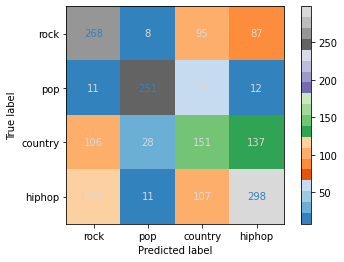

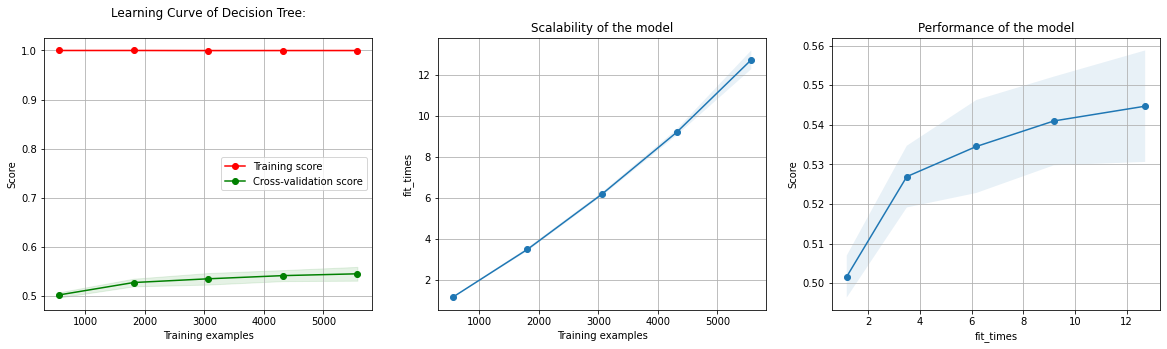






The model Naive Bayes have score of 0.6145893164847789.
 Confusion Matrix:



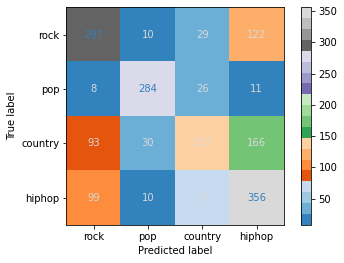

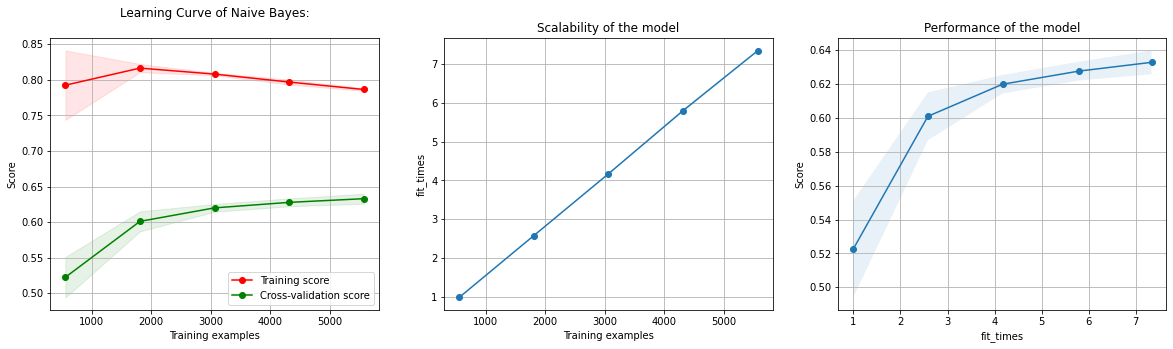

In [ ]:
dt_tree=DecisionTreeClassifier()
lg=LogisticRegression()
naive=MultinomialNB()
svm=SVC()
best_recall_val=0
result=[]
for clf,model in zip([dt_tree,naive,svm,lg],["Decision Tree","Naive Bayes","SVM","Logistic Regression"]):
    clf.fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    clf_score_test=accuracy_score(y_true=y_test,y_pred=y_predicted)
    result.append({"Model":model,"y_test_score":clf_score_test})
    print(f"\n\nThe model {model} have score of {clf_score_test}.\n Confusion Matrix:\n")
    cm=confusion_matrix(y_true=y_test,y_pred=y_predicted)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["rock","pop","country","hiphop"])
    disp.plot(cmap='tab20c',include_values=True)
    plt.show()
    plot_learning_curve(clf,f"Learning Curve of {model}:\n",X_train,y_train)
    plt.show()
    print("\n\n")

In [ ]:
result_df=pd.DataFrame(result)

result_df = result_df.set_index('Model')

fig = plt.figure(figsize=(7,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .3

result_df.y_test_score.plot(kind='bar',color='green',ax=ax,width=width, position=0)


ax.set_ylabel('Test on y_test')
print("\n")
plt.show()